Plot the score box plot and histogram plot

In [1]:
import sys
sys.path.append("/home/wanxinli/deep_patient/")

from ast import literal_eval
from common import *
from mimic_common import *
from multiprocess import Pool
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import time


In [2]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")

Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [3]:
def is_trans(med_accuracy, med_f1):
    """ 
    Determines if a response is transferrable by median accuracy and median f1.
    If both stats are > 1, then tranferrable
    If neither > 1, then untransferrable
    Else, undecidable
    """
    
    if med_accuracy > 1 and med_f1 > 1:
        return 1
    if med_accuracy < 1 and med_f1 < 1:
        return -1
    return 0

<Figure size 750x350 with 0 Axes>

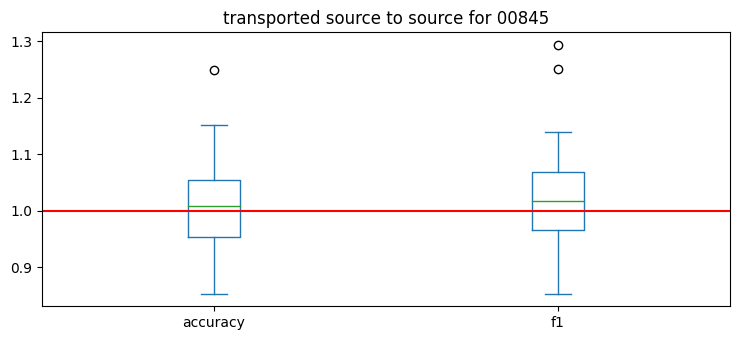

00845 transferrable?: 1


<Figure size 750x350 with 0 Axes>

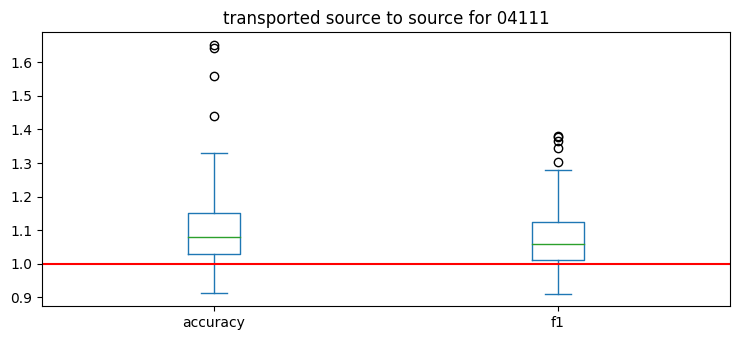

04111 transferrable?: 1


<Figure size 750x350 with 0 Axes>

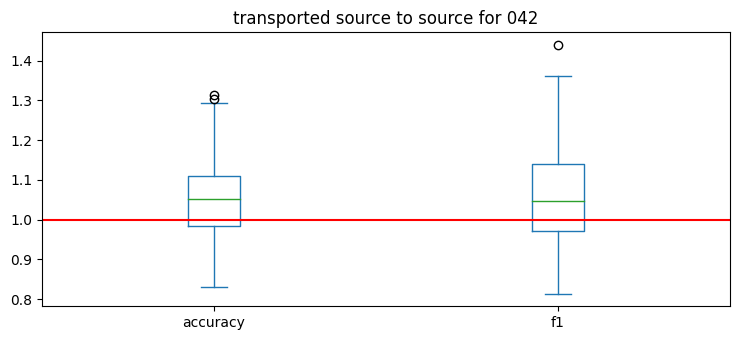

042 transferrable?: 1


<Figure size 750x350 with 0 Axes>

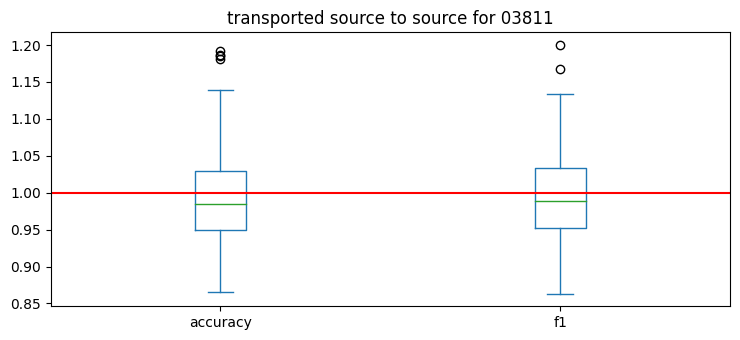

03811 transferrable?: -1


<Figure size 750x350 with 0 Axes>

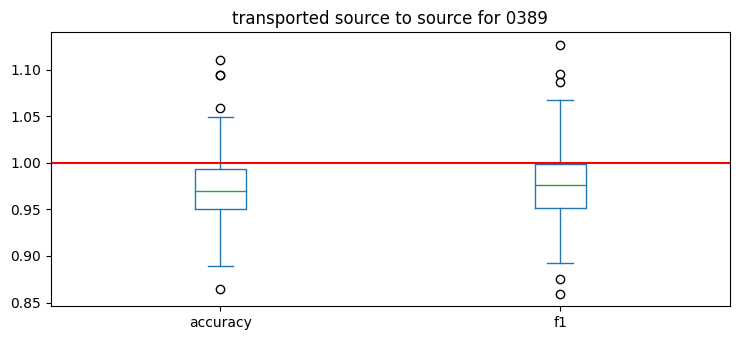

0389 transferrable?: -1


<Figure size 750x350 with 0 Axes>

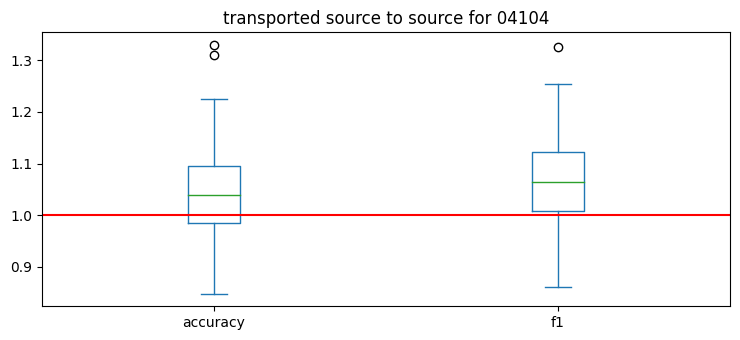

04104 transferrable?: 1


<Figure size 750x350 with 0 Axes>

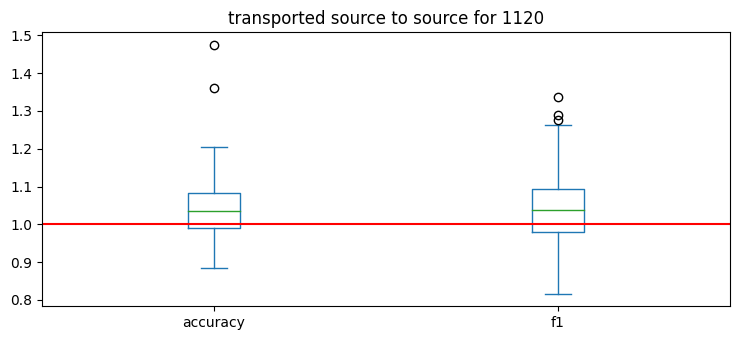

1120 transferrable?: 1


<Figure size 750x350 with 0 Axes>

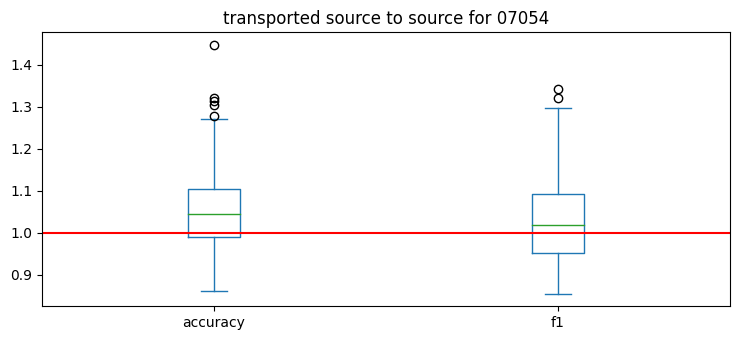

07054 transferrable?: 1


<Figure size 750x350 with 0 Axes>

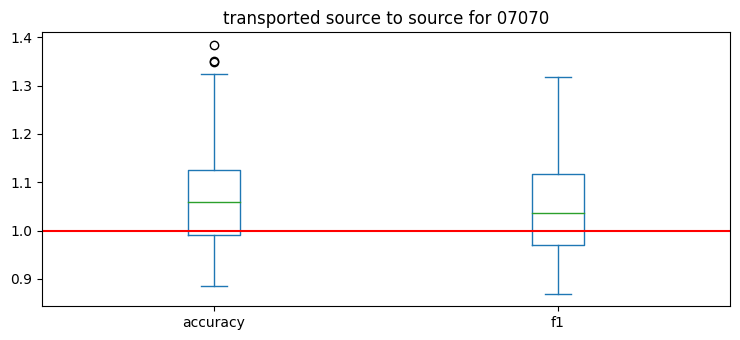

07070 transferrable?: 1


<Figure size 750x350 with 0 Axes>

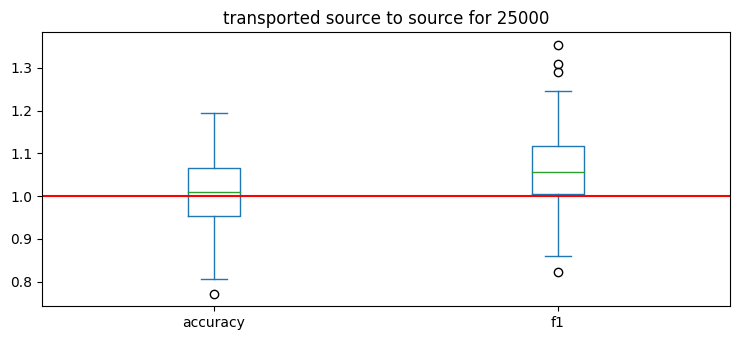

25000 transferrable?: 1


<Figure size 750x350 with 0 Axes>

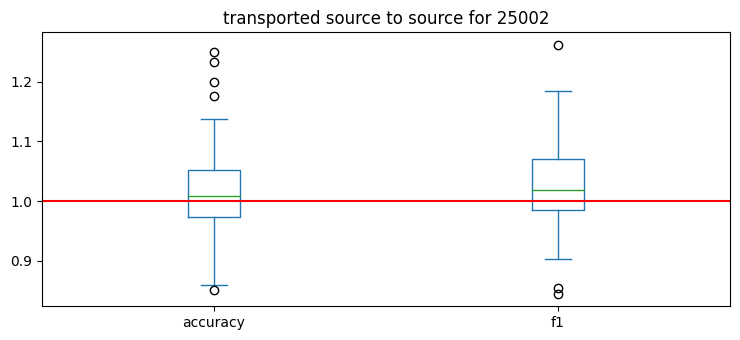

25002 transferrable?: 1


<Figure size 750x350 with 0 Axes>

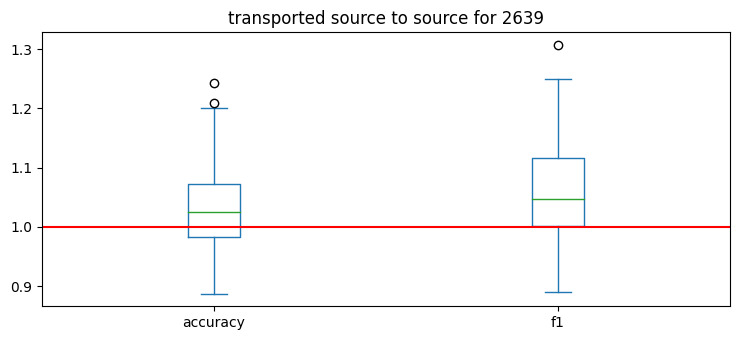

2639 transferrable?: 1


<Figure size 750x350 with 0 Axes>

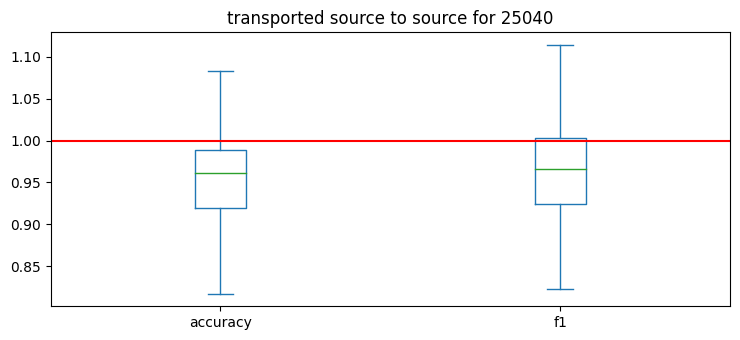

25040 transferrable?: -1


<Figure size 750x350 with 0 Axes>

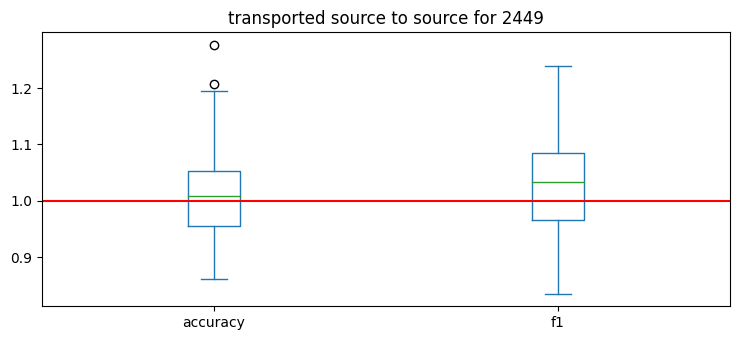

2449 transferrable?: 1


<Figure size 750x350 with 0 Axes>

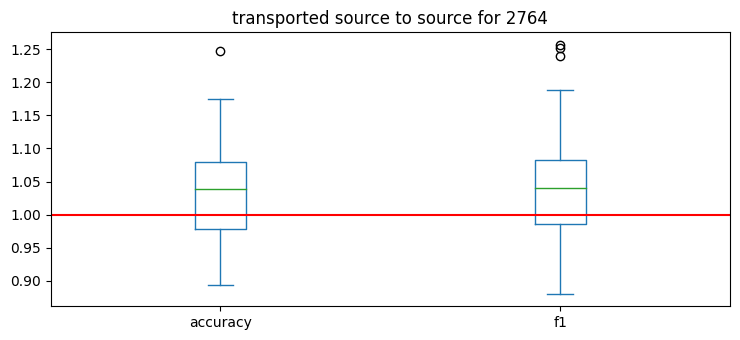

2764 transferrable?: 1


<Figure size 750x350 with 0 Axes>

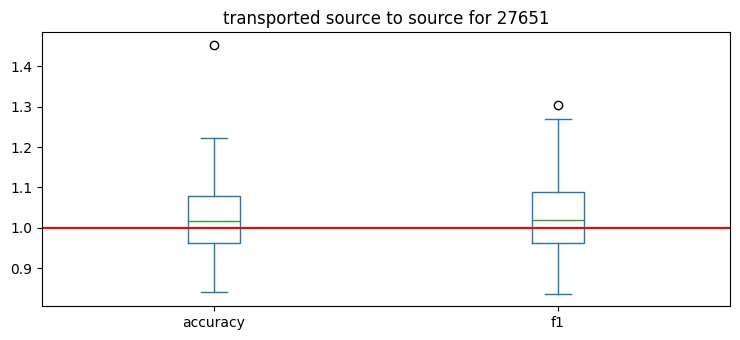

27651 transferrable?: 1


<Figure size 750x350 with 0 Axes>

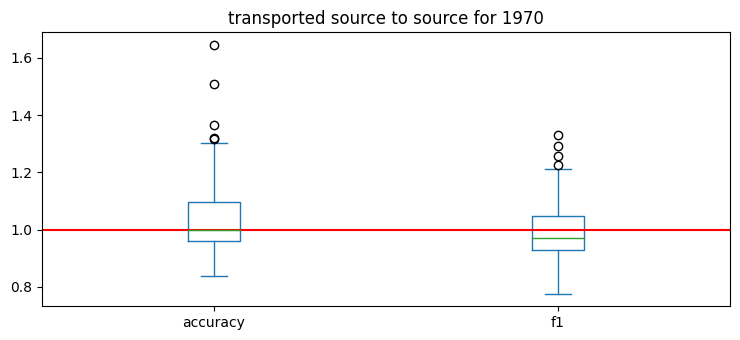

1970 transferrable?: 0


<Figure size 750x350 with 0 Axes>

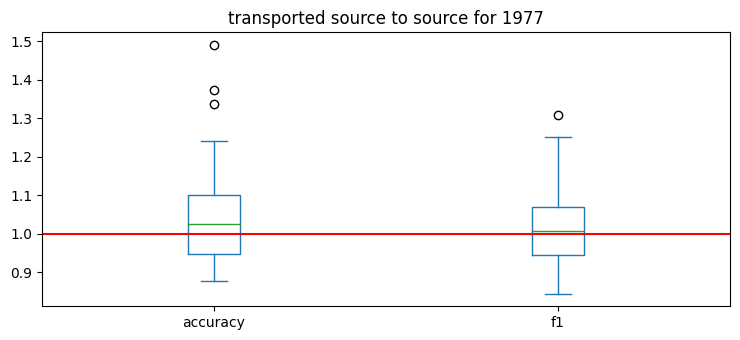

1977 transferrable?: 1


<Figure size 750x350 with 0 Axes>

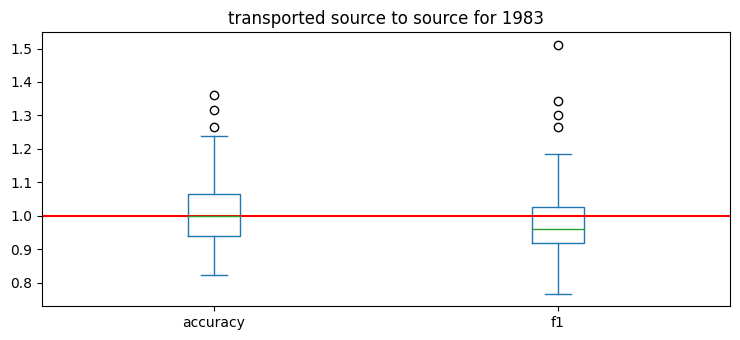

1983 transferrable?: 0


<Figure size 750x350 with 0 Axes>

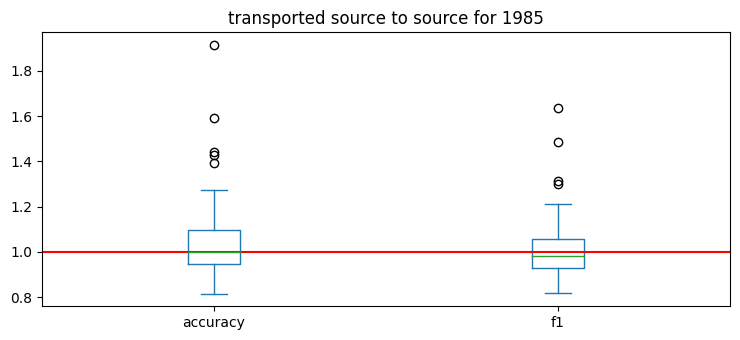

1985 transferrable?: 0


<Figure size 750x350 with 0 Axes>

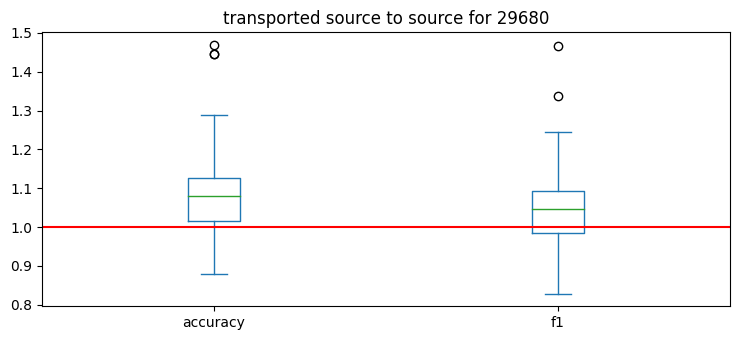

29680 transferrable?: 1


<Figure size 750x350 with 0 Axes>

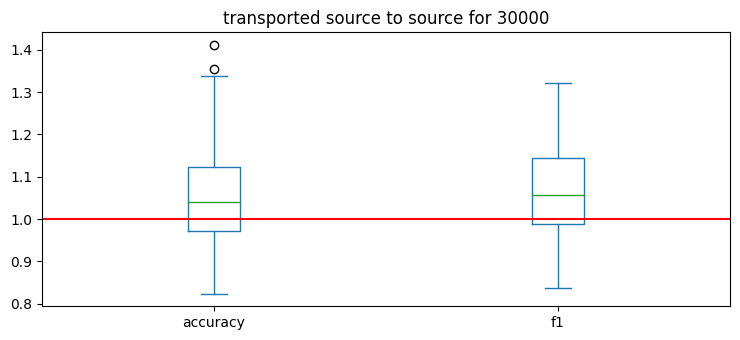

30000 transferrable?: 1


<Figure size 750x350 with 0 Axes>

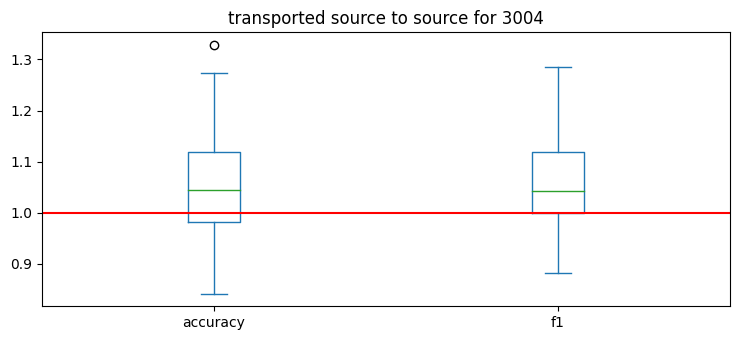

3004 transferrable?: 1


<Figure size 750x350 with 0 Axes>

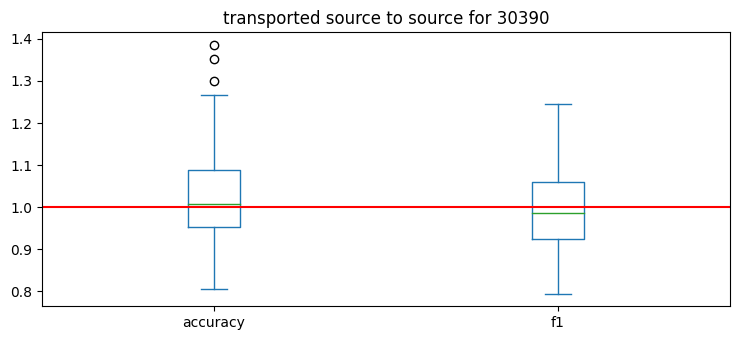

30390 transferrable?: 0


<Figure size 750x350 with 0 Axes>

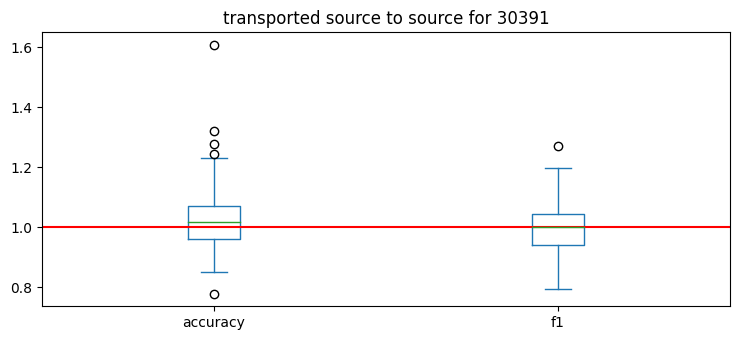

30391 transferrable?: 1


<Figure size 750x350 with 0 Axes>

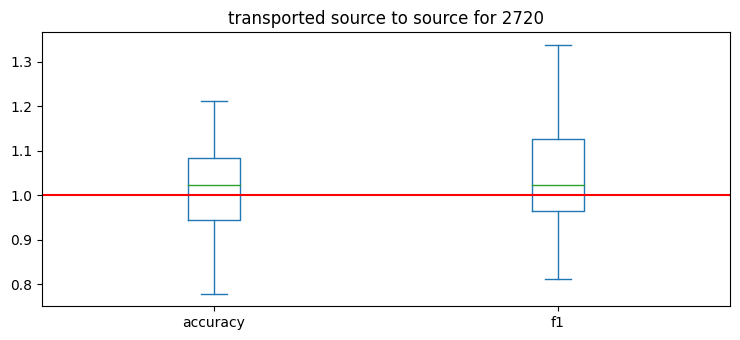

2720 transferrable?: 1


<Figure size 750x350 with 0 Axes>

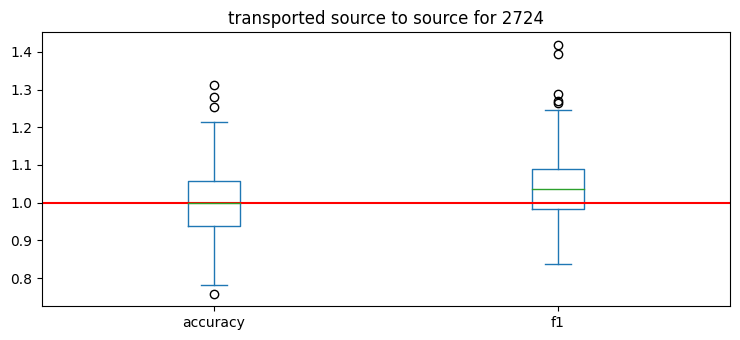

2724 transferrable?: 0


<Figure size 750x350 with 0 Axes>

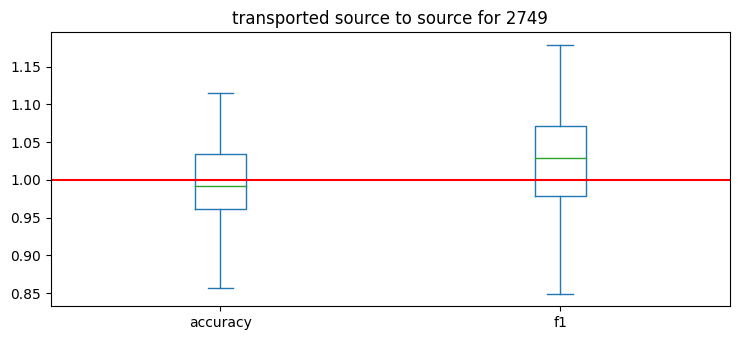

2749 transferrable?: 0


<Figure size 750x350 with 0 Axes>

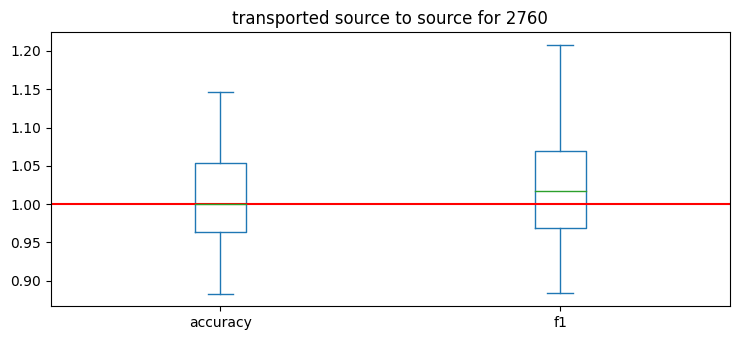

2760 transferrable?: 0


<Figure size 750x350 with 0 Axes>

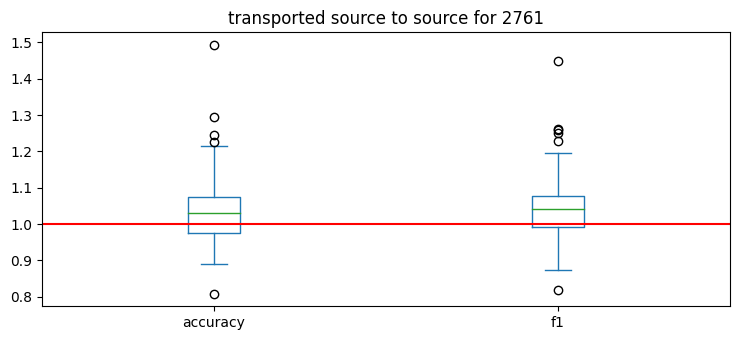

2761 transferrable?: 1


<Figure size 750x350 with 0 Axes>

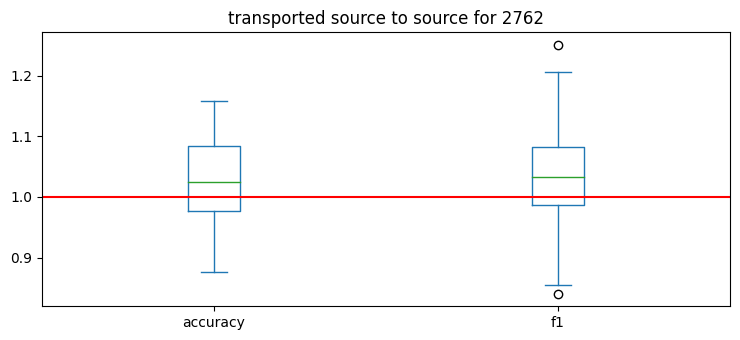

2762 transferrable?: 1


<Figure size 750x350 with 0 Axes>

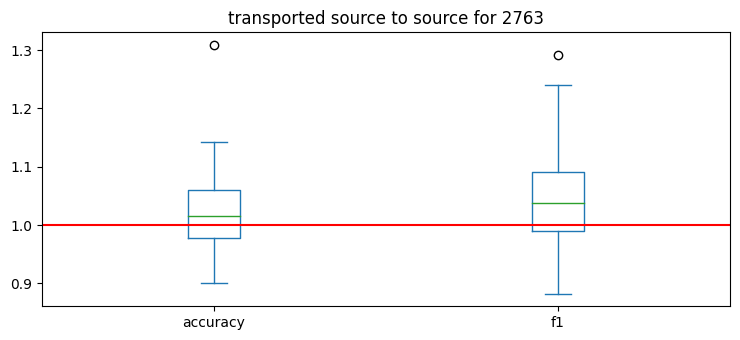

2763 transferrable?: 1


<Figure size 750x350 with 0 Axes>

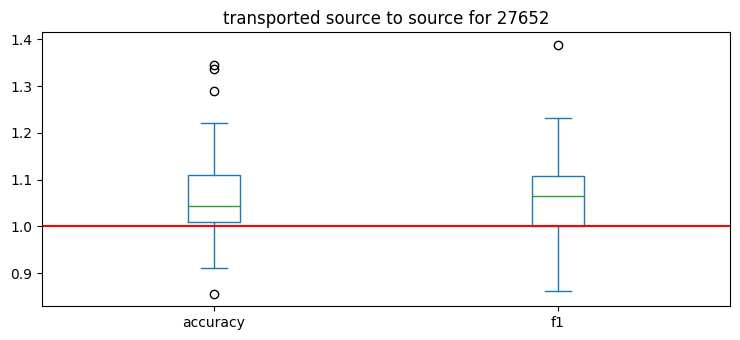

27652 transferrable?: 1


<Figure size 750x350 with 0 Axes>

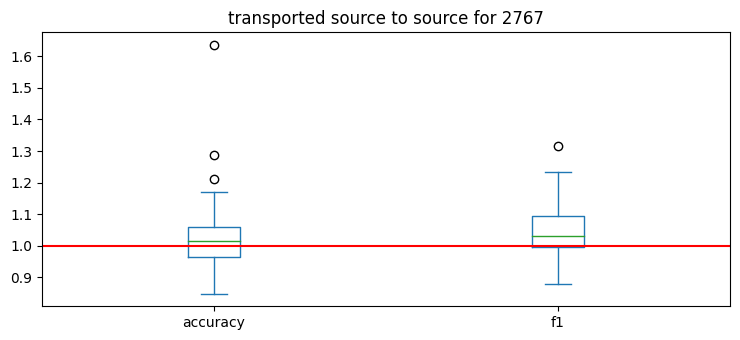

2767 transferrable?: 1


<Figure size 750x350 with 0 Axes>

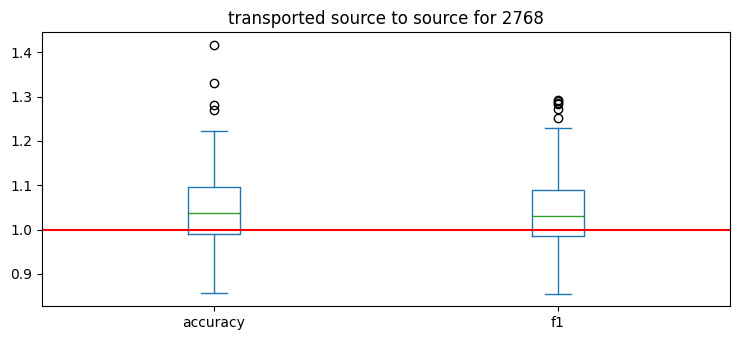

2768 transferrable?: 1


<Figure size 750x350 with 0 Axes>

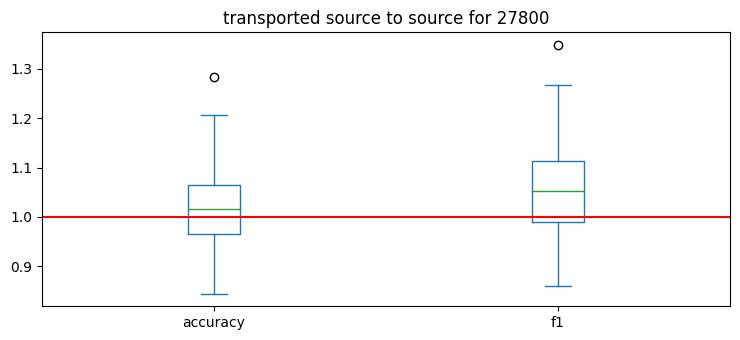

27800 transferrable?: 1


<Figure size 750x350 with 0 Axes>

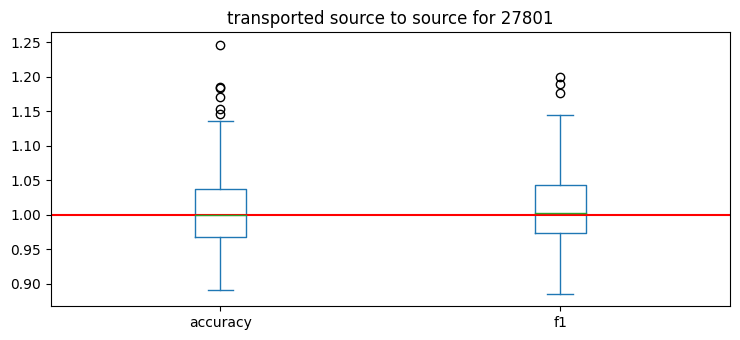

27801 transferrable?: 0


<Figure size 750x350 with 0 Axes>

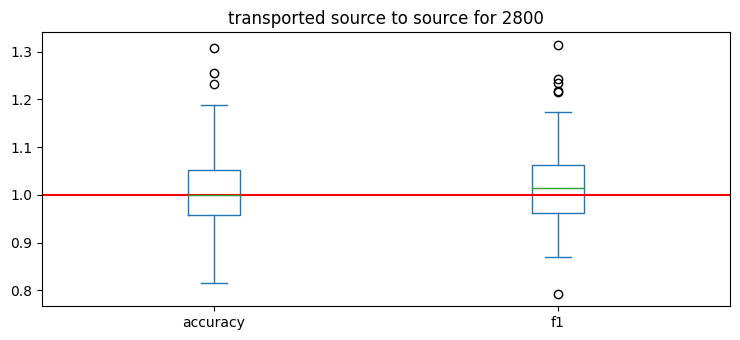

2800 transferrable?: 0


<Figure size 750x350 with 0 Axes>

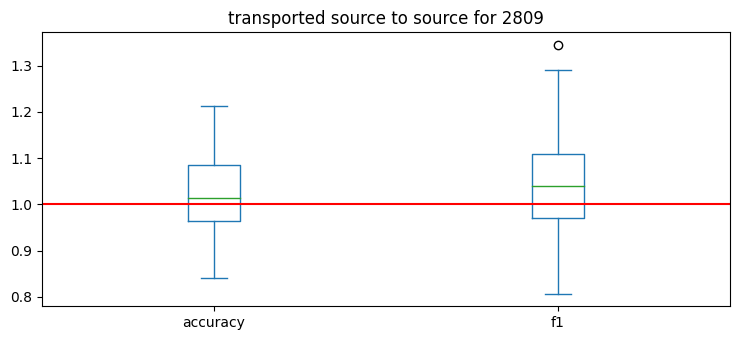

2809 transferrable?: 1
transferrable codes are: ['00845', '04111', '042', '04104', '1120', '07054', '07070', '25000', '25002', '2639', '2449', '2764', '27651', '1977', '29680', '30000', '3004', '30391', '2720', '2761', '2762', '2763', '27652', '2767', '2768', '27800', '2809']
untransferrable codes are: ['03811', '0389', '25040']
undecidable codes are: ['1970', '1983', '1985', '30390', '2724', '2749', '2760', '27801', '2800']


In [17]:
label_code_path = os.path.join(output_dir, "selected_summary_mimic.csv")
label_code_df = pd.read_csv(label_code_path, header=0, index_col=0)
label_codes = list(label_code_df.index)

trans_codes = []
untrans_codes = []
undec_codes = []
for label_code in label_codes:
    score_path = os.path.join(output_dir, f"exp3_{label_code}_score.csv")
    if os.path.exists(score_path):
        med_accuracy, med_f1 = box_plot_short(score_path, label_code)
        trans_ind = is_trans(med_accuracy, med_f1)
        print(f"{label_code} transferrable?: {trans_ind}")
        if trans_ind == 1:
            trans_codes.append(label_code)
        elif trans_ind == -1:
            untrans_codes.append(label_code)
        else:
            undec_codes.append(label_code)

        # write is_trans to the file
        label_code_df.at[label_code, 'transferrable'] = trans_ind

print("transferrable codes are:", trans_codes)
print("untransferrable codes are:", untrans_codes)
print("undecidable codes are:", undec_codes)
label_code_df.to_csv(os.path.join(output_dir, "selected_summary_mimic.csv"), header=True, index=True)



In [18]:
label_code_df

,short title,long title,male rate,female rate,male to female rate ratio,male freq,female freq,is trans,transferrable
ICD code,,,,,,,,,
00845,Int inf clstrdium dfcile,Intestinal infection due to Clostridium difficile,0.022094,0.027511,0.803101,728.0,716.0,NaN,1.0
04111,Mth sus Stph aur els/NOS,Methicillin susceptible Staphylococcus aureus ...,0.012504,0.011181,1.118295,412.0,291.0,NaN,1.0
042,Human immuno virus dis,Human immunodeficiency virus [HIV] disease,0.012322,0.005072,2.429428,406.0,132.0,NaN,1.0
03811,Meth susc Staph aur sept,Methicillin susceptible Staphylococcus aureus ...,0.010137,0.006955,1.457538,334.0,181.0,NaN,-1.0
0389,Septicemia NOS,Unspecified septicemia,0.061396,0.065396,0.938833,2023.0,1702.0,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
E8780,Abn react-org transplant,Surgical operation with transplant of whole or...,0.007860,0.006570,1.196343,259.0,171.0,NaN,NaN
E8781,Abn react-artif implant,Surgical operation with implant of artificial ...,0.011806,0.012219,0.966217,389.0,318.0,NaN,NaN
E8782,Abn react-anastom/graft,"Surgical operation with anastomosis, bypass, o...",0.024431,0.015600,1.566109,805.0,406.0,NaN,NaN
